In [2]:
!pip install requests pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ilk olarak yıllık mülteci sayısını bulcaz

In [4]:
df1= pd.read_csv("immigration_stats.csv")
df1=df1[df1["TIME_PERIOD"]>=2008]
columns1=["TIME_PERIOD", "OBS_VALUE"]
filtered_df1=df1[columns1]
filtered_df1.head()


,TIME_PERIOD,OBS_VALUE
10,2008,682146
11,2009,346216
12,2010,404055
13,2011,489422
14,2012,592175


In [5]:
df2=pd.read_csv("crimes.csv")
columns2=["TIME_PERIOD", "International classification of crime for statistical purposes (ICCS)", "TIME_PERIOD", "OBS_VALUE"]
filtered_df2=df2[columns2]
filtered_df2.head()




,TIME_PERIOD,International classification of crime for statistical purposes (ICCS),TIME_PERIOD,OBS_VALUE
0,2008,Intentional homicide,2008,656
1,2009,Intentional homicide,2009,721
2,2010,Intentional homicide,2010,699
3,2011,Intentional homicide,2011,689
4,2012,Intentional homicide,2012,619


In [13]:
# filtered_df2'deki tekrarlanan sütunları görelim
print("filtered_df2 sütunlarının detaylı listesi:")
for i, col in enumerate(filtered_df2.columns):
    print(f"{i}: {col}")

# Şimdi ilk TIME_PERIOD sütununu kullanalım ve diğerini kaldıralım
filtered_df2 = filtered_df2.loc[:, ~filtered_df2.columns.duplicated()]

# Kontrol edelim
print("\nTekrar eden sütunlar kaldırıldıktan sonra:")
print(filtered_df2.columns.tolist())

# Şimdi birleştirme işlemini yapalım
merged_df = pd.merge(filtered_df1, filtered_df2, on='TIME_PERIOD', how='inner')

# Sonucu kontrol edelim
print("\nBirleştirilmiş veri seti:")
print(merged_df.head())

filtered_df2 sütunlarının detaylı listesi:
0: TIME_PERIOD
1: TIME_PERIOD
2: crime_type
3: crime_count

Tekrar eden sütunlar kaldırıldıktan sonra:
['TIME_PERIOD', 'crime_type', 'crime_count']

Birleştirilmiş veri seti:
   TIME_PERIOD  OBS_VALUE                      crime_type  crime_count
0         2008     682146            Intentional homicide          656
1         2008     682146  Attempted intentional homicide         1610
2         2008     682146                 Serious assault       518499
3         2008     682146                      Kidnapping         1857
4         2008     682146                 Sexual violence        56784


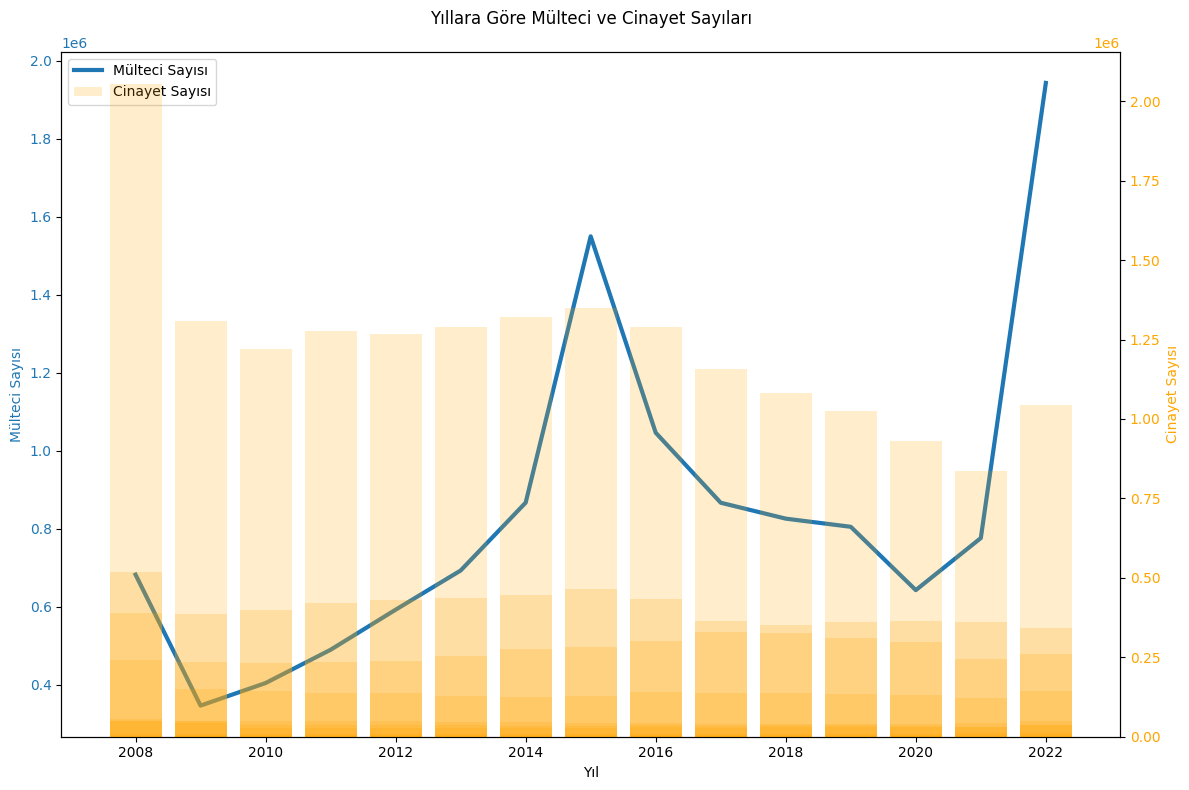

In [29]:
# Çift eksenli grafik (sütun ve çizgi grafiği birlikte)
fig, ax1 = plt.subplots(figsize=(12, 8))


# Cinayet sayısı için ikinci eksen (sütun grafiği)
ax2 = ax1.twinx()
color2 = 'orange'  
ax2.set_ylabel('Cinayet Sayısı', color=color2)
bars = ax2.bar(merged_df['TIME_PERIOD'], merged_df['crime_count'], alpha=0.2,
             color=color2, label='Cinayet Sayısı')
ax2.tick_params(axis='y', labelcolor=color2)
# Mülteci sayısı için ilk eksen (çizgi grafiği)
color1 = '#1f77b4'  
ax1.set_xlabel('Yıl')
ax1.set_ylabel('Mülteci Sayısı', color=color1)
line = ax1.plot(merged_df['TIME_PERIOD'], merged_df['refugee_count'], 
                color=color1, label='Mülteci Sayısı', linewidth=3)
ax1.tick_params(axis='y', labelcolor=color1)


# Başlık
plt.title('Yıllara Göre Mülteci ve Cinayet Sayıları', pad=20)

# Göstergeyi ekleyelim
lines = line + [bars]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# x ekseni etiketlerini döndürelim
plt.xticks(rotation=45)

# Grafik düzenini ayarlayalım
plt.tight_layout()
plt.show()